In [11]:
#TYET A 44 Hemant Joshi
#Write a Python Code for Compiling a Feature Vector by Using  Oriented Fast and Rotated Brief

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
img = cv2.imread('D:\TYETA\CV\s2.jpg')

(150, 32)


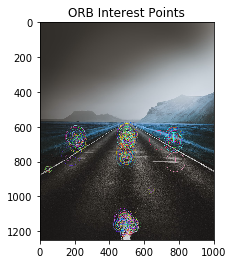

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create(150)  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img, None)
img_keypoints = cv2.drawKeypoints(img,key_points,img, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
print(description.shape)
plt.figure()
plt.title('ORB Interest Points')
plt.imshow(img_keypoints); plt.show()

In [5]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans

main_folder=r"D:\TYETA\CV\Data_Set"

for folder in os.listdir(main_folder):
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create(150)#initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        csv_data=out.to_csv(str(folder)+'_orb.csv', mode='a', header=False)
    print('Extraction of ' + str(folder) +' images Done!')  

Extraction of Cement Road images Done!
Extraction of Kaccha Road images Done!
Extraction of Paver Road images Done!
Extraction of Tarcoal Road images Done!


In [8]:
#KMeans Clustering

In [6]:
import pickle
main_folder=r"D:\TYETA\CV\Data_Set"

for folder in os.listdir(main_folder):
    road_df=pd.read_csv(str(folder)+'_orb.csv').iloc[:, 1:]
    kmeans = KMeans(n_clusters=5)
    model=kmeans.fit(road_df)
    pickle.dump(model, open(str(folder)+'_orb.pkl', 'wb')) 

In [7]:
for folder in os.listdir(main_folder):
    model = pickle.load(open(str(folder)+'_orb.pkl', "rb"))
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create(150)#initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        
        output=pd.DataFrame(model.predict(out))
        hist=np.histogram(output.values,bins=[0,1,2,3,4,5])
        histout=pd.DataFrame(hist[0])
        
        csv_data=histout.transpose().to_csv(str(folder)+'exp12'+'.csv', mode='a', header=False)
        
    print('KMeans of ' + str(folder) +' images Done!')


KMeans of Cement Road images Done!
KMeans of Kaccha Road images Done!
KMeans of Paver Road images Done!
KMeans of Tarcoal Road images Done!


In [9]:
#saving all the dataframes together

In [10]:
from csv import writer
from csv import reader

main_folder=r"D:\TYETA\CV\Data_Set"
i=0
for folder in os.listdir(main_folder):
    with open(str(folder)+'exp12'+'.csv', 'r') as read_obj, \
        open('Final_ORB_exp12.csv', 'a+', newline='') as write_obj:
        csv_reader = reader(read_obj)     # Create a csv.reader object from the input file object
        csv_writer = writer(write_obj)    # Create a csv.writer object from the output file object
        # Read each row of the input csv file as list
        for row in csv_reader:
            row.append(i)            # Append the class in the row / list
            csv_writer.writerow(row)      # Add the updated row / list to the output file
    i+=1